# Excercise 1 Task 2
## Examination of runtime improvments of ensemble classifiers on a 250k elements dataset in dependence of the number of available cores
### This notebook should run on an 8-core server environment to provide similar results

In [1]:
# Load neccessary libraries changed pandas import for convinience
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
# creation of a dataset consisting of 250k samples
# with the following parameters
samples = 250*1000
features = 40
informative = 5
redundant=4
X, Y = make_classification(n_samples=samples,
                           n_features=features,
                           n_informative=informative,
                           n_redundant=4)

In [3]:
# Split-out validation dataset
validation_size = 0.20
seed = 7
scoring = 'accuracy'
X_train, X_validation, Y_train, Y_validation = train_test_split(X,
                                                                Y,
                                                                test_size=validation_size,
                                                                random_state=seed)

## Using 8 estimators (usage of one per core if 8 cores (jobs) are used)
### One RandomForestClassifier (RFC) for each number of jobs (1 to 8 (inclusive)) is instantiated and trained on the training set of 200k elements. During the training the train time is measured  with the magic %timeit function and stored in an array.

In [4]:
# Create Random Forest Classifier
estimators = 8  # For mapping one estimator per core in case of max 8 cores
jobs = 8
time_it_results = []
for _ in range(jobs):
    rf_class = RandomForestClassifier(n_estimators=estimators, n_jobs=(_+1))
    tr = %timeit -o rf_class.fit(X_train, Y_train)
    time_it_results.append(tr)

1 loop, best of 3: 10.8 s per loop
1 loop, best of 3: 6.24 s per loop
1 loop, best of 3: 4.76 s per loop
1 loop, best of 3: 3.45 s per loop
1 loop, best of 3: 3.43 s per loop
1 loop, best of 3: 3.63 s per loop
1 loop, best of 3: 3.83 s per loop
1 loop, best of 3: 2.76 s per loop


In [6]:
# best_times are extracted
best_times = [timer.best for timer in time_it_results]

## Plot of the training time in seconds of each RFC against the number of used cores (number of jobs)

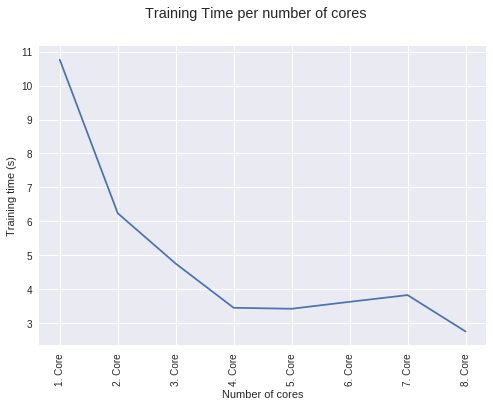

In [7]:
x = np.arange(1,9)
labels = ['%i. Core' % i for i in x]
fig = plt.figure()
fig.suptitle('Training Time per number of cores')
ax = fig.add_subplot(111)
ax.set_xlabel('Number of cores')
ax.set_ylabel('Training time (s)')
ax.plot(x, best_times)
plt.xticks(x, labels, rotation='vertical')
plt.show()

Execution time is exponentially decreasing till 4 cpu cores are utilized. Further increase and decrease dependes on mainly two factors.
- Overhead intruduced by managing multiprocessing
- Overhead introduced by copying the datasets for processing

A slight increase in runtime between 4 and 7 cores can be experienced till 8 cpu cores are utilized